In [19]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
graph_no_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/graph_no_d_f/epoch1/2020/combined_rmse_0000_0731_006h_240h_graph_no_d_f.nc')
graph_no1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/V/member1/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')
graph_no2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/V/member2/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')
graph_no3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_no_ens/0_1/V/member3/combined_rmse_0000_0047_006h_240h_graph_no_ens.nc')

graph_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/graph_d_fine/epoch3/2020/combined_rmse_0000_0731_006h_240h_graph_d_f.nc')
graph_1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/V/member1/combined_rmse_0000_0047_006h_240h_graph_ens.nc')
graph_2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/V/member2/combined_rmse_0000_0047_006h_240h_graph_ens.nc')
graph_3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/graph_ens/0_1/V/member3/combined_rmse_0000_0047_006h_240h_graph_ens.nc')

wxformer_2020 = xr.open_dataset('/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/wxformer/epoch0/2020/combined_rmse_0000_0731_006h_240h_wxformer.nc')
wxformer_1 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/V/member1/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')
wxformer_2 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/V/member2/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')
wxformer_3 = xr.open_dataset('/glade/derecho/scratch/akn7/CREDIT_arXiv/VERIF/wxformer_ens/0_1/V/member3/combined_rmse_0000_0047_006h_240h_wxformer_ens.nc')

ifs_2020 = xr.open_dataset("/glade/campaign/cisl/aiml/akn7/CREDIT_arXiv/VERIF/IFS/IFS_2020_combined_rmse_000_731_006h_240h_IFS.nc")


In [21]:
def idx_tuple_fn(i):
    
    return {
        'year': [(0, 16), (270, 286), (392, 408)][i], # May 15 is day 136, July 15 is day 197 
        'parts': [(0, 16), (16, 32), (32, 48)][i] # (0, 16) is for 2020-01-01T00Z to 2020-01-08T12Z; (16, 32) for 2020-05-15T00Z to 2020-05-22T12Z; (32, 48) for 2020-07-15T00Z to 2020-07-22T12Z
    }
    {

    }

var_name = 'V500'
# idx_tuple = None, 16

idx_dict = idx_tuple_fn(0)
year_idx_tuple = idx_dict['year']
# year_idx_tuple = idx_dict['year']
idx_tuple = idx_dict['parts']

In [22]:
ifs_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([1.292142 , 1.4691826, 1.5418205, 1.760024 , 1.8639324, 2.0976288,
       2.217627 , 2.4448814, 2.5871172, 2.8377752, 3.0007296, 3.2413406,
       3.4221485, 3.6605747, 3.8530235, 4.1105633, 4.3260393, 4.5897484,
       4.812064 , 5.073348 , 5.2499833, 5.527378 , 5.7799835, 6.0767026,
       6.3438725, 6.635747 , 6.88114  , 7.116288 , 7.339001 , 7.5998588,
       7.837723 , 8.073297 , 8.28731  , 8.526063 , 8.762153 , 9.01704  ,
       9.229313 , 9.444216 , 9.604185 , 9.79271  ], dtype=float32)
Coordinates:
    level    float32 4B ...
Dimensions without coordinates: time

In [23]:
graph_no_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.8853419, 1.3541352, 1.5152862, 1.8136032, 1.9470334, 2.2066014,
       2.3416488, 2.5827515, 2.7415485, 2.9819045, 3.1503792, 3.3803968,
       3.5591614, 3.793351 , 3.9843884, 4.2229733, 4.397546 , 4.6035533,
       4.7567334, 4.9441795, 5.080763 , 5.267874 , 5.4058003, 5.573516 ,
       5.696453 , 5.843637 , 5.948344 , 6.0674405, 6.1700287, 6.3010893,
       6.4148235, 6.5556574, 6.686094 , 6.815056 , 6.9372196, 7.0629444,
       7.1579294, 7.26222  , 7.3322897, 7.4348   ], dtype=float32)
Dimensions without coordinates: time

In [24]:
graph_no1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.88534194, 1.3541353 , 1.5152861 , 1.8136033 , 1.9470336 ,
       2.206601  , 2.341648  , 2.5827515 , 2.7415485 , 2.9819047 ,
       3.1503797 , 3.3804097 , 3.5591598 , 3.7932281 , 3.9842958 ,
       4.2228603 , 4.3971486 , 4.603506  , 4.7567277 , 4.9441876 ,
       5.0808167 , 5.2674794 , 5.405979  , 5.573796  , 5.6959014 ,
       5.8425093 , 5.947454  , 6.0668387 , 6.169518  , 6.2966614 ,
       6.4089613 , 6.5521574 , 6.679821  , 6.8090563 , 6.930894  ,
       7.062709  , 7.160626  , 7.2678924 , 7.339657  , 7.4405627 ],
      dtype=float32)
Dimensions without coordinates: time

In [25]:
graph_no2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.8853419, 1.3541353, 1.515286 , 1.8136033, 1.9470335, 2.2066014,
       2.341649 , 2.582752 , 2.741549 , 2.9819052, 3.15038  , 3.3804128,
       3.5591662, 3.7933514, 3.98426  , 4.2229214, 4.3977337, 4.6035886,
       4.7567034, 4.944306 , 5.081049 , 5.267815 , 5.406167 , 5.5737195,
       5.6955237, 5.842527 , 5.9476876, 6.0676317, 6.1695023, 6.296545 ,
       6.4088864, 6.5531206, 6.683765 , 6.810676 , 6.9337835, 7.0630746,
       7.155928 , 7.260166 , 7.333461 , 7.430875 ], dtype=float32)
Dimensions without coordinates: time

In [26]:
graph_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.8668714, 1.3260853, 1.474161 , 1.7677941, 1.8928552, 2.152107 ,
       2.2872114, 2.5247402, 2.680755 , 2.913129 , 3.077051 , 3.3048308,
       3.4816766, 3.7147522, 3.8994336, 4.1358104, 4.3061647, 4.518181 ,
       4.6723585, 4.866519 , 5.0277677, 5.237867 , 5.4149847, 5.615392 ,
       5.7755256, 5.9616103, 6.108648 , 6.273208 , 6.4057064, 6.5584307,
       6.687052 , 6.8371825, 6.9605913, 7.096856 , 7.196456 , 7.3306017,
       7.41591  , 7.5652447, 7.646502 , 7.7921376], dtype=float32)
Dimensions without coordinates: time

In [27]:
# ifs_2020[var_name].isel(days=slice(None, 16)).mean('days')
graph_1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.94920224, 1.4424391 , 1.6326537 , 1.913726  , 2.046359  ,
       2.2822018 , 2.414614  , 2.6314256 , 2.7834034 , 2.9982374 ,
       3.1602955 , 3.3736596 , 3.5508966 , 3.7729068 , 3.9593003 ,
       4.186614  , 4.3587093 , 4.563526  , 4.7211795 , 4.9083676 ,
       5.0726743 , 5.2779803 , 5.4573574 , 5.653731  , 5.820334  ,
       6.003124  , 6.153189  , 6.3134255 , 6.4470997 , 6.5937552 ,
       6.722677  , 6.86656   , 6.9887757 , 7.1226826 , 7.2224274 ,
       7.3519125 , 7.437779  , 7.582512  , 7.6672215 , 7.809243  ],
      dtype=float32)
Dimensions without coordinates: time

In [28]:
graph_2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.8998729, 1.3699892, 1.5373456, 1.8237822, 1.9538792, 2.2020416,
       2.33753  , 2.5654182, 2.7209947, 2.9450462, 3.1094253, 3.3302157,
       3.50854  , 3.7362585, 3.9228177, 4.1547112, 4.3268967, 4.535435 ,
       4.692235 , 4.8831544, 5.0461483, 5.25376  , 5.432995 , 5.631541 ,
       5.7950525, 5.9810605, 6.1294913, 6.2917833, 6.4255886, 6.5753436,
       6.7043467, 6.8522906, 6.9733195, 7.106562 , 7.2080965, 7.3376236,
       7.4195137, 7.566555 , 7.650499 , 7.7941055], dtype=float32)
Dimensions without coordinates: time

In [29]:
graph_3[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([0.9824321, 1.4924204, 1.6971664, 1.9758734, 2.109707 , 2.3381197,
       2.4680474, 2.6779115, 2.827062 , 3.03608  , 3.1961284, 3.404823 ,
       3.5808234, 3.7993257, 3.984956 , 4.2095056, 4.381086 , 4.583601 ,
       4.7406573, 4.9256535, 5.089459 , 5.293234 , 5.4731555, 5.668349 ,
       5.833419 , 6.016259 , 6.1664352, 6.326178 , 6.462921 , 6.610592 ,
       6.7395787, 6.884115 , 7.007308 , 7.1382694, 7.2360373, 7.3655787,
       7.449953 , 7.593205 , 7.6753545, 7.8177724], dtype=float32)
Dimensions without coordinates: time

In [30]:
wxformer_2020[var_name].isel(days=slice(*year_idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([1.0854973, 1.52365  , 1.6818287, 1.9507537, 2.0699327, 2.3045778,
       2.4247062, 2.6503139, 2.8046782, 3.0395377, 3.2254949, 3.4722986,
       3.677394 , 3.9254768, 4.1282415, 4.3782206, 4.57411  , 4.809581 ,
       5.0125756, 5.245308 , 5.447308 , 5.676427 , 5.8674045, 6.085053 ,
       6.2557263, 6.4664617, 6.6093845, 6.8051906, 6.936676 , 7.118538 ,
       7.22859  , 7.3833385, 7.4768534, 7.6082306, 7.6862245, 7.805477 ,
       7.853841 , 7.94507  , 7.969664 , 8.053067 ], dtype=float32)
Dimensions without coordinates: time

In [31]:
wxformer_1[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([1.192149 , 1.6004168, 1.7794687, 2.0454772, 2.1759644, 2.394499 ,
       2.516726 , 2.7314303, 2.8869689, 3.1108494, 3.2903545, 3.5187004,
       3.7085986, 3.9375908, 4.124153 , 4.356409 , 4.536411 , 4.7580104,
       4.9440117, 5.1648746, 5.3509088, 5.570355 , 5.747864 , 5.96637  ,
       6.1343718, 6.351944 , 6.4960303, 6.703186 , 6.840955 , 7.0319686,
       7.1468873, 7.3092093, 7.407372 , 7.5466914, 7.6333194, 7.7585526,
       7.8119445, 7.904228 , 7.9282737, 8.010967 ], dtype=float32)
Dimensions without coordinates: time

In [32]:
wxformer_2[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([1.1225253, 1.5471854, 1.7139028, 1.9790518, 2.102485 , 2.3281991,
       2.449144 , 2.6692545, 2.8244154, 3.0537379, 3.2365353, 3.4734387,
       3.6700983, 3.9077504, 4.101576 , 4.341947 , 4.5291514, 4.7578077,
       4.9522214, 5.1795654, 5.3732944, 5.5983076, 5.782509 , 6.0021853,
       6.1720605, 6.388199 , 6.5325937, 6.735905 , 6.8719096, 7.0597887,
       7.1732783, 7.333202 , 7.429804 , 7.5660048, 7.649521 , 7.773321 ,
       7.8258686, 7.9186077, 7.9435205, 8.026522 ], dtype=float32)
Dimensions without coordinates: time

In [33]:
wxformer_3[var_name].isel(days=slice(*idx_tuple)).mean('days')

<xarray.DataArray 'V500' (time: 40)> Size: 160B
array([1.24057  , 1.6393008, 1.826676 , 2.0944123, 2.2298963, 2.444682 ,
       2.5679343, 2.7795255, 2.9352877, 3.1558862, 3.3334312, 3.5569296,
       3.7431352, 3.9672294, 4.149653 , 4.377313 , 4.5531306, 4.7702985,
       4.951159 , 5.167831 , 5.34922  , 5.564835 , 5.738252 , 5.955228 ,
       6.1218057, 6.3392096, 6.4827332, 6.6913276, 6.829536 , 7.021832 ,
       7.137181 , 7.300294 , 7.399108 , 7.539936 , 7.6279263, 7.7533712,
       7.8066034, 7.8981433, 7.9214787, 8.003959 ], dtype=float32)
Dimensions without coordinates: time

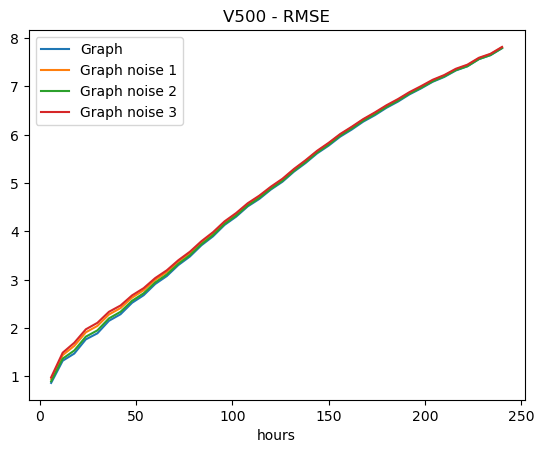

In [34]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# year_idx_tuple = None, 16
plt.plot(x, graph_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Graph')
plt.plot(x, graph_1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 1')
plt.plot(x, graph_2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 2')
plt.plot(x, graph_3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();

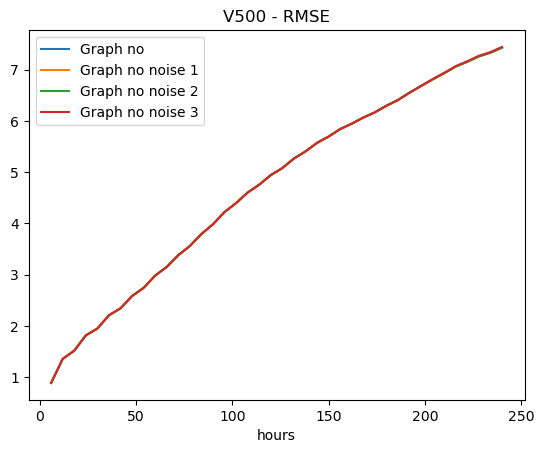

In [35]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# var_name = 'V500'
# idx_tuple = None, None 

plt.plot(x, graph_no_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Graph no')
plt.plot(x, graph_no1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 1')
plt.plot(x, graph_no2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 2')
plt.plot(x, graph_no3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Graph no noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();

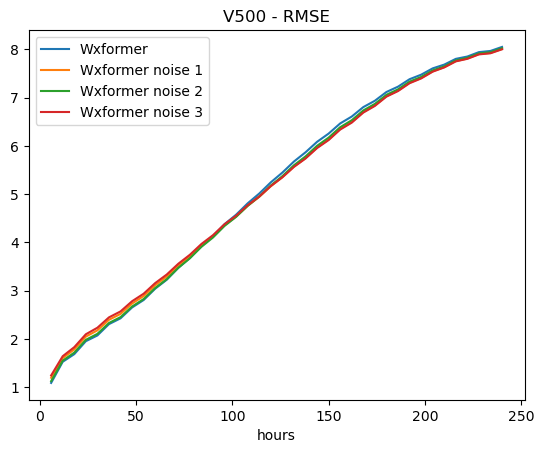

In [36]:
x = np.arange(1, len(ifs_2020.time) + 1) * 6 

# var_name = 'V500'
# idx_tuple = None, None 

plt.plot(x, wxformer_2020[var_name].isel(days=slice(*year_idx_tuple)).mean(dim='days').values, label='Wxformer')
plt.plot(x, wxformer_1[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 1')
plt.plot(x, wxformer_2[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 2')
plt.plot(x, wxformer_3[var_name].isel(days=slice(*idx_tuple)).mean(dim='days').values, label='Wxformer noise 3')

plt.xlabel('hours')
plt.title(f'{var_name} - RMSE')
# plt.loglog()
plt.legend();